In [ ]:
# ==============================================================================
# Coding Python ini dibuat dalam rangka menyelesaikan Capstone Project:
# HACKTIV8
# Student Development Initiative wave 8 (Agustus 2025)
# Data Classification and Summarization Using IBM Granite (via Replicate)
# [ONLINE] Data Batch 23 (instruktur: Manfred Michael)
#
# Oleh : JOSUA SIANTURI
# ==============================================================================

# LANGKAH 1: INSTALASI DAN IMPORT LIBRARY
!pip install pandas matplotlib seaborn replicate --upgrade --quiet

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from google.colab import userdata

In [ ]:
# ==============================================================================
# LANGKAH 2: KONFIGURASI API REPLICATE
# Pastikan API token sudah disimpan di Secrets dengan nama: 'api_token'
# ==============================================================================
try:
    token = userdata.get("api_token")
    os.environ["REPLICATE_API_TOKEN"] = token
    client = replicate.Client(api_token=token)  # Kunci agar token terbaca
    print("Token API Replicate berhasil dikonfigurasi.")
except Exception as e:
    print(f"Gagal mengambil token API. Pastikan sudah disimpan sebagai 'api_token'. Error: {e}")

Token API Replicate berhasil dikonfigurasi.


In [ ]:
# ==============================================================================
# LANGKAH 3: MEMUAT DAN MEMAHAMI DATA LONGSOR
# ==============================================================================

file_path = '/content/Data_Longsor_SumateraUtara_2008_2025.csv'

try:
    df = pd.read_csv(file_path)
    df['tanggal_kejadian'] = pd.to_datetime(df['dt'], errors='coerce')
    df.dropna(subset=['tanggal_kejadian'], inplace=True)
    df['tahun'] = df['tanggal_kejadian'].dt.year
    df['bulan'] = df['tanggal_kejadian'].dt.month_name()

    # Filter hanya tanah longsor di Sumatera Utara
    df = df[
        (df['jenis_bencana'].str.lower() == 'tanah longsor') &
        (df['provinsi'].str.lower() == 'sumatera utara')
    ]

    print("Data berhasil dimuat dan difilter.")
    print(df.head())
    df.info()

except FileNotFoundError:
    print(f"File tidak ditemukan: {file_path}")
except Exception as e:
    print(f"Terjadi error saat memuat data: {e}")

Data berhasil dimuat dan difilter.
                                     id                   dt     bulan  tahun  \
0  c81ebc2a-ecc6-4163-a2c4-e39025c4f46a  2025-02-22 18:00:00  February   2025   
1  c8866346-efa6-40b4-bc20-9f3d883008f4  2025-02-19 17:30:00  February   2025   
2  5d1fe576-1454-4a94-a0f3-b73bee2d3a71  2024-12-29 20:30:00  December   2024   
3  48af33ff-c85c-4301-8ef7-cc5888f452eb  2024-12-19 10:00:00  December   2024   
4  7aa1ebda-c5c9-4881-89e1-2edfa0363bbf  2024-11-27 00:01:00  November   2024   

   minggu  id_provinsi_sdi  id_provinsi_bps        provinsi  id_kab_sdi  \
0       8               12               12  Sumatera Utara       12.03   
1       8               12               12  Sumatera Utara       12.16   
2      52               12               12  Sumatera Utara       12.77   
3      51               12               12  Sumatera Utara       12.77   
4      48               12               12  Sumatera Utara       12.06   

   id_kab_bps  ... rumah_ru

In [ ]:
df.tail()

,id,dt,bulan,tahun,minggu,id_provinsi_sdi,id_provinsi_bps,provinsi,id_kab_sdi,id_kab_bps,...,rumah_rusak_ringan,rumah_terendam,pendidikan_rusak,fasyankes_rusak,rumah_ibadat_rusak,kantor_rusak,jembatan_rusak,fasum_rusak,menderita_mengungsi,tanggal_kejadian
140,ee056df2-00a7-41b1-8245-c39912bd9ea0,2010-02-04 08:08:08,February,2010,5,12,12,Sumatera Utara,12.03,1203,...,0,0,0,0,0,0,0,0,45,2010-02-04 08:08:08
141,0badd89c-e0bc-45b9-bb37-857cbd9f2db1,2010-01-12 08:08:08,January,2010,2,12,12,Sumatera Utara,12.02,1205,...,0,0,0,0,0,0,0,0,0,2010-01-12 08:08:08
142,93b5d74e-5044-4bf4-aff1-6aea4b327600,2009-12-16 08:08:08,December,2009,51,12,12,Sumatera Utara,12.03,1203,...,0,0,0,0,0,0,0,0,0,2009-12-16 08:08:08
143,8e4ce0a8-78de-433c-9e83-58bb5fbd9b74,2008-09-26 08:08:08,September,2008,39,12,12,Sumatera Utara,12.04,1201,...,0,0,0,0,0,0,0,0,72,2008-09-26 08:08:08
144,6f73497b-38c5-495a-b1da-4936592d9220,2008-03-13 08:08:08,March,2008,11,12,12,Sumatera Utara,12.13,1202,...,1,0,0,0,0,0,0,0,0,2008-03-13 08:08:08



 Membuat grafik jumlah kejadian tanah longsor per tahun...


/tmp/ipython-input-1585860189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kejadian_per_tahun.index, y=kejadian_per_tahun.values, palette="Reds")


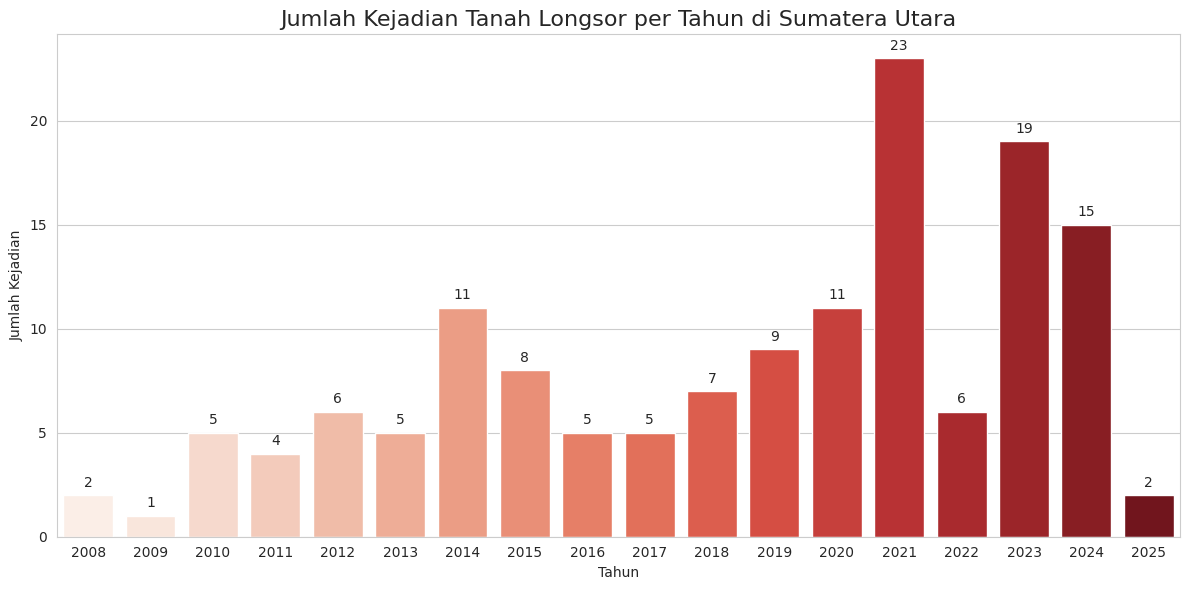

In [ ]:
# ==============================================================================
# LANGKAH 4: ANALISA DAN VISUALISASI DATA
# ==============================================================================

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- Analisa 1: Jumlah Kejadian per Tahun ---
print("\n Membuat grafik jumlah kejadian tanah longsor per tahun...")
kejadian_per_tahun = df.groupby('tahun')['jumlah_kejadian'].sum()

plt.figure()
ax = sns.barplot(x=kejadian_per_tahun.index, y=kejadian_per_tahun.values, palette="Reds")
ax.set_title('Jumlah Kejadian Tanah Longsor per Tahun di Sumatera Utara', fontsize=16)
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah Kejadian')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()


 Membuat grafik distribusi kejadian per bulan...


/tmp/ipython-input-3225960299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kejadian_per_bulan.index, y=kejadian_per_bulan.values, palette="plasma")


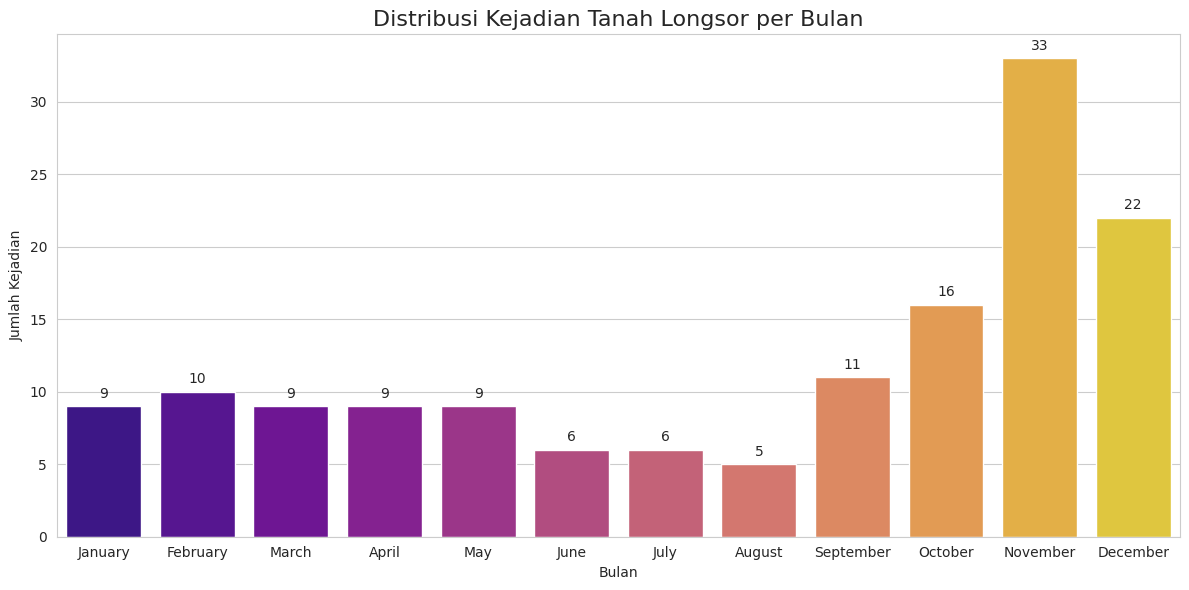

In [ ]:
# --- Analisa 2: Kejadian Berdasarkan Bulan ---
print("\n Membuat grafik distribusi kejadian per bulan...")
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
kejadian_per_bulan = df['bulan'].value_counts().reindex(bulan_order)

plt.figure()
ax = sns.barplot(x=kejadian_per_bulan.index, y=kejadian_per_bulan.values, palette="plasma")
ax.set_title('Distribusi Kejadian Tanah Longsor per Bulan', fontsize=16)
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Kejadian')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()


  Membuat grafik kabupaten paling terdampak...


/tmp/ipython-input-3765140171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=kejadian_per_kabupaten.index, x=kejadian_per_kabupaten.values, palette="magma")


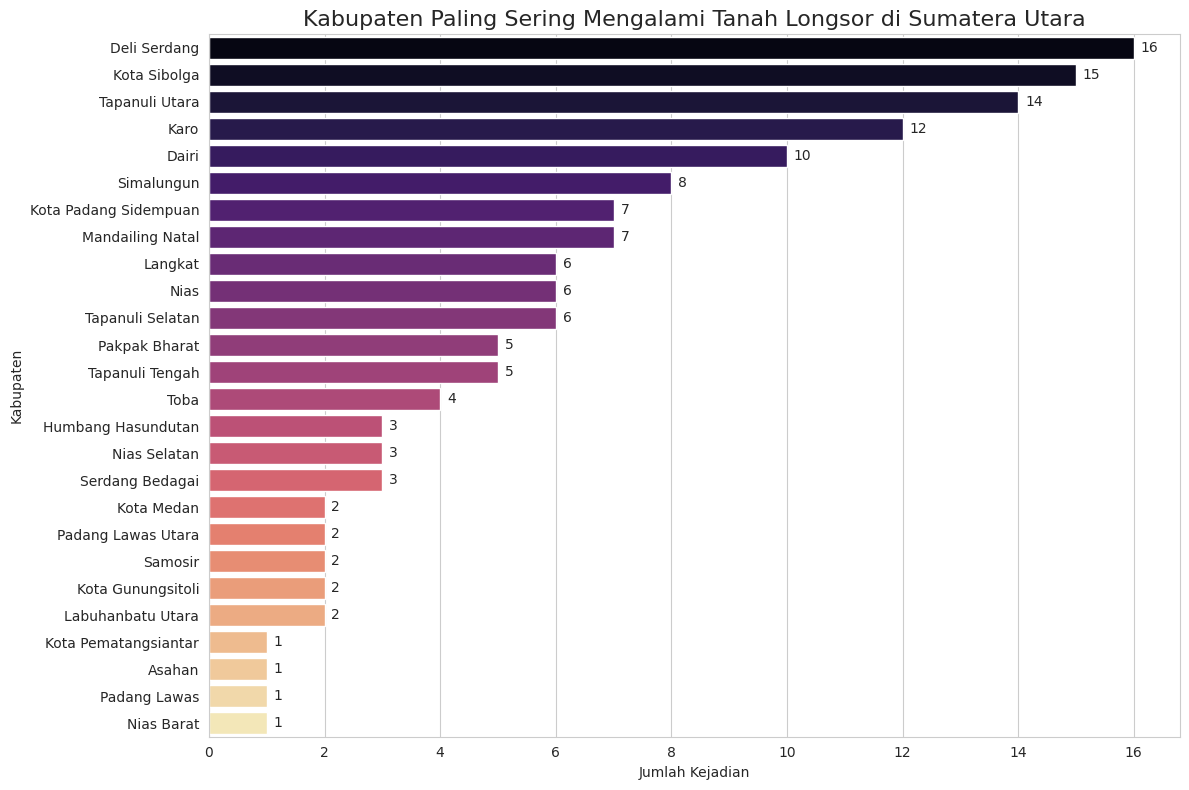

In [ ]:
# --- Analisa 3: Wilayah Paling Sering Terdampak ---
print("\n  Membuat grafik kabupaten paling terdampak...")
kejadian_per_kabupaten = df.groupby('kabupaten')['jumlah_kejadian'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(y=kejadian_per_kabupaten.index, x=kejadian_per_kabupaten.values, palette="magma")
ax.set_title('Kabupaten Paling Sering Mengalami Tanah Longsor di Sumatera Utara', fontsize=16)
ax.set_xlabel('Jumlah Kejadian')
ax.set_ylabel('Kabupaten')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
# ==============================================================================
# LANGKAH 5: RINGKASAN UNTUK AI
# ==============================================================================

summary_for_ai = f"""
Summary of Landslide Data in North Sumatra (2008–2025):
1. Landslide incidents per year: {kejadian_per_tahun.to_dict()}
2. Landslide incidents per month (cumulative): {kejadian_per_bulan.to_dict()}
3. Most affected regencies (top 10): {kejadian_per_kabupaten.head(10).to_dict()}
"""

print("\n --- Ringkasan Data untuk AI ---")
print(summary_for_ai)


 --- Ringkasan Data untuk AI ---

Summary of Landslide Data in North Sumatra (2008–2025):
1. Landslide incidents per year: {2008: 2.0, 2009: 1.0, 2010: 5.0, 2011: 4.0, 2012: 6.0, 2013: 5.0, 2014: 11.0, 2015: 8.0, 2016: 5.0, 2017: 5.0, 2018: 7.0, 2019: 9.0, 2020: 11.0, 2021: 23.0, 2022: 6.0, 2023: 19.0, 2024: 15.0, 2025: 2.0}
2. Landslide incidents per month (cumulative): {'January': 9, 'February': 10, 'March': 9, 'April': 9, 'May': 9, 'June': 6, 'July': 6, 'August': 5, 'September': 11, 'October': 16, 'November': 33, 'December': 22}
3. Most affected regencies (top 10): {'Deli Serdang': 16.0, 'Kota Sibolga': 15.0, 'Tapanuli Utara': 14.0, 'Karo': 12.0, 'Dairi': 10.0, 'Simalungun': 8.0, 'Kota Padang Sidempuan': 7.0, 'Mandailing Natal': 7.0, 'Langkat': 6.0, 'Nias': 6.0}



In [ ]:
# ==============================================================================
# LANGKAH 6: MENGGUNAKAN AI UNTUK ANALISA DAN REKOMENDASI
# ==============================================================================

print("\n Memanggil AI untuk analisa dan rekomendasi...")

prompt_untuk_ai = f"""
You are a disaster mitigation expert working with the North Sumatra provincial government.
Using the following historical landslide data, please provide:

1. **Key Trend Analysis:** What are the peak years and months? Which regions are most affected?
2. **Potential Root Causes:** Suggest what may have contributed to the patterns.
3. **Actionable Recommendations:** Provide solutions categorized into:
   - Short-Term (next 6 months)
   - Medium-Term (1-3 years)
   - Long-Term (3+ years)

**Landslide Data Summary:**
{summary_for_ai}
"""

try:
    model_name = "ibm-granite/granite-3.3-8b-instruct"

    output = replicate.run(
        model_name,
        input={
            "prompt": prompt_untuk_ai,
            "max_new_tokens": 1000,
            "temperature": 0.7,
            "top_p": 0.9
        }
    )

    response_text = "".join(output)
    print("\n --- HASIL ANALISA DAN REKOMENDASI DARI AI ---")
    print(response_text)

except Exception as e:
    print(f" Gagal memanggil AI. Error: {e}")



 Memanggil AI untuk analisa dan rekomendasi...

 --- HASIL ANALISA DAN REKOMENDASI DARI AI ---
## North Sumatra Landslide Analysis and Mitigation Recommendations

### 1. Key Trend Analysis

**Peak Years and Months:**
- **Peak Years:** 2014, 2019, 2021, 2023 show the highest number of landslide incidents, with 2021 being the peak (23 incidents).
- **Peak Months:** November stands out with 33 incidents, followed by December with 22 incidents, indicating a strong seasonal pattern likely linked to heavy rainfall during these months.

**Most Affected Regions:**
- Top 10 most affected regencies based on cumulative incidents from 2008 to 2025 are: Deli Serdang, Kota Sibolga, Tapanuli Utara, Karo, Dairi, Simalungun, Kota Padang Sidempuan, Mandailing Natal, Langkat, and Nias.

### 2. Potential Root Causes

- **Rainfall Patterns:** The pronounced increase in landslides, particularly in November and December, correlates with the rainy season in North Sumatra. Heavy, prolonged rains saturate the 